<a href="https://colab.research.google.com/github/EugIva/ProzorovEI209M_CV/blob/main/HW3_Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задача №3 - Найди клетки**
Даны снимки раковых клеток. Существует задача - определить стадию рака клетки по такому изображению. Для того, чтобы подойти к решению классификации рака клетки, необходимо сначала подготовить данные.

Исходные изображения в реальных задачах могут быть очень большого размера (более 20000 px). Однако из визуального анализа можно заметить, что большая часть этих снимков пустая и не несет в себе полезную информацию.

Ваша задача выделить небольшие ячейки изображений из исходного так, чтобы на ячейках было только изображение клетки.

В качестве аргументов у функции будут значения:

исходное изображние;    
размер ячейки;    
количество ячеек.     
Доп вопрос - как можно выяснить какие нужны значения аргументов, чтобы они подходили для большинства исходных снимков?

**Ответ:** Определение оптимальных значений аргументов для функции зависит от характеристик исходных снимков. Можно попробовать автоматически подобрать некоторые из параметров, например, анализируя размеры снимков для подбора размера ячейки, или проведя большую выборку по множеству подобных снимков получить среднее количество ячеек для снимков.


In [39]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches

In [44]:
def load_image(image_path):
    """Загружает изображение из файла."""
    return np.array(Image.open(image_path))

def extract_cells(image_path, image_np, cell_size, cell_count, padding=10):
    """Извлекает ячейки из изображения."""
    img_height, img_width, _ = image_np.shape
    cells = []  # Список для хранения извлеченных ячеек
    extracted_cells = 0  # Счетчик извлеченных ячеек
    fig, ax = plt.subplots(1)
    ax.imshow(image_np)

    for y in range(0, img_height, cell_size):
        for x in range(0, img_width, cell_size):
            if extracted_cells >= cell_count:
                break  # Останавливаемся, если достигли максимального количества ячеек

            cell = image_np[y:y + cell_size, x:x + cell_size]
            if cell.mean() < 240:  # порог для фильтрации пустых участков
                cells.append(cell)  # Добавляем ячейку в список
                extracted_cells += 1  # Увеличиваем счетчик извлеченных ячеек
                # Добавляем рамку на исходное изображение для визуализации
                rectangle = patches.Rectangle((x, y), cell_size, cell_size, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rectangle)

    plt.title(f'Оригинал: '+ image_path)
    plt.show()
    return cells

def create_image_mosaic(image_path, image_cells, cell_dimension, padding=10):
    """
    Создает мозаику из изображений.
    """
    # Ограничиваем количество ячеек до 16
    if len(image_cells) > 16:
        image_cells = image_cells[:16]
    # Дублируем ячейки, если их меньше 16
    elif len(image_cells) < 16:
        repeat_count, remainder = divmod(16, len(image_cells))
        image_cells = image_cells * repeat_count + image_cells[:remainder]

    grid_size = 4
    mosaic_width = grid_size * cell_dimension + (grid_size - 1) * padding
    mosaic = np.ones((mosaic_width, mosaic_width, 3), dtype=np.uint8) * 255

    for index, cell_image in enumerate(image_cells):
        row = index // grid_size  # Определяем строку в сетке
        col = index % grid_size  # Определяем столбец в сетке
        y_start = row * (cell_dimension + padding)  # Начальная координата по y
        x_start = col * (cell_dimension + padding)  # Начальная координата по x
        mosaic[y_start:y_start + cell_dimension, x_start:x_start + cell_dimension] = cell_image

    plt.figure(figsize=(8, 8))  # Создаем фигуру для отображения мозаики
    plt.imshow(mosaic)
    plt.axis('off')
    plt.title(f"Мозаика для {image_path}")
    plt.show()

def create_cells(image_path, cell_size, cell_count, padding=10):
    """Основная функция для извлечения и отображения ячеек."""
    image_np = load_image(image_path)
    cells = extract_cells(image_path, image_np, cell_size, cell_count, padding)
    create_image_mosaic(image_path, cells, cell_size, padding)



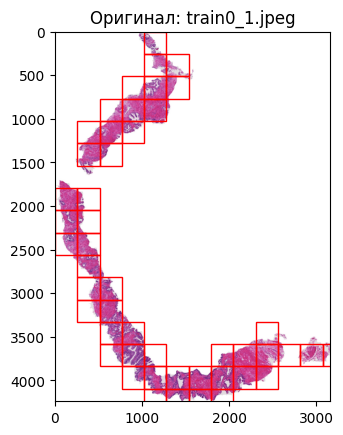

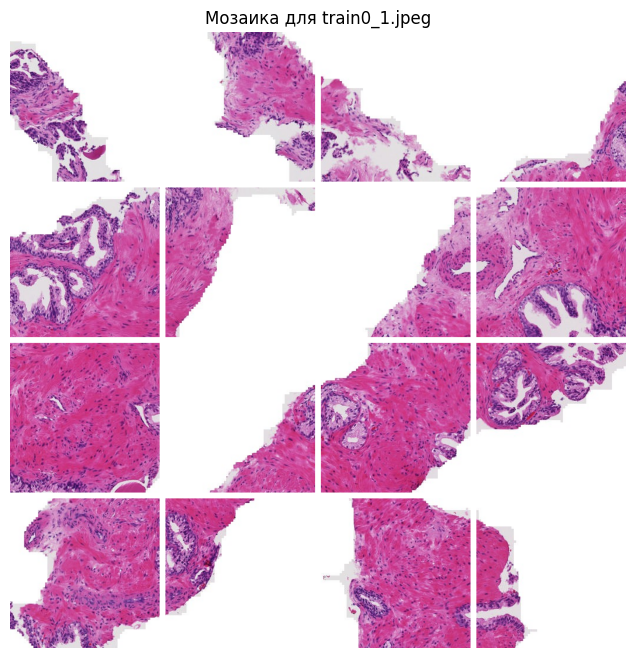

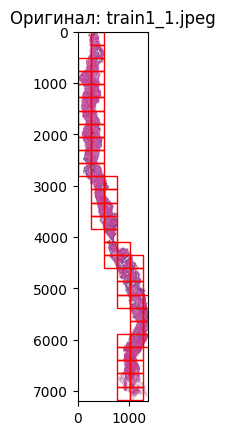

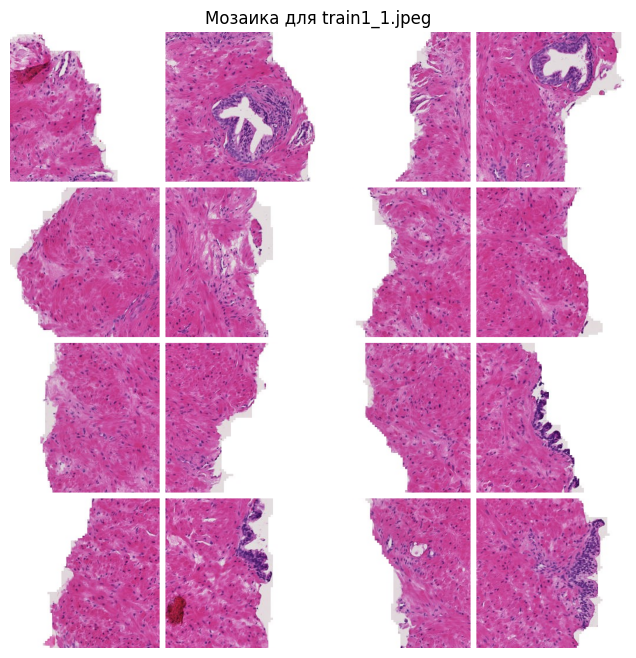

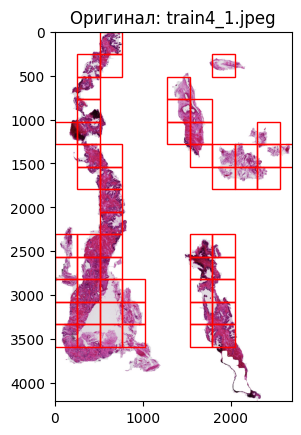

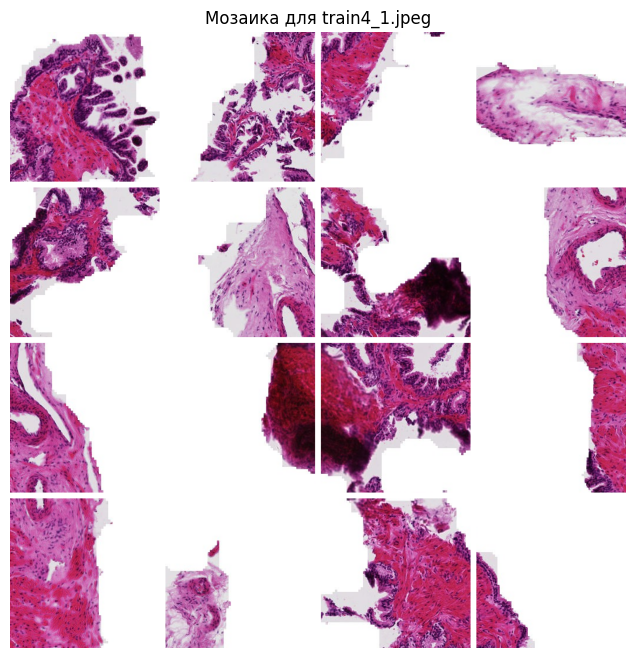

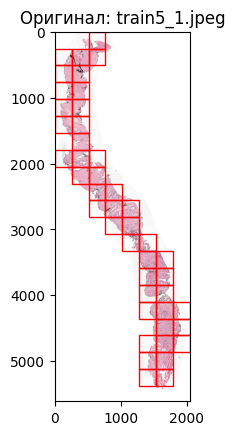

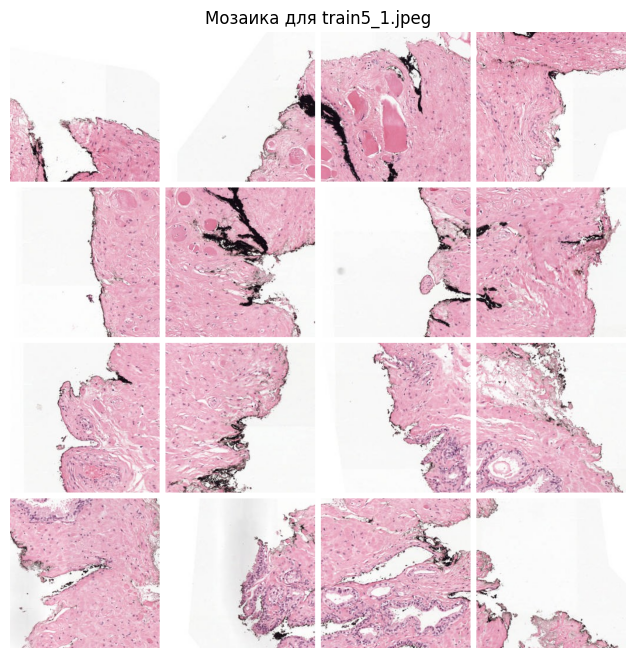

In [45]:
image_paths = ["train0_1.jpeg", "train1_1.jpeg", "train4_1.jpeg", "train5_1.jpeg"]
for path in image_paths:
    create_cells(path, cell_size=256, cell_count=56)